In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherHistory.csv',index_col=['Formatted Date'])
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 10)

In [4]:
df=df.drop(['Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)',
            'Visibility (km)','Pressure (millibars)','Daily Summary'],axis=1)

In [5]:
df.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00.000 +0200,7.388889,0.89
2006-04-01 01:00:00.000 +0200,7.227778,0.86
2006-04-01 02:00:00.000 +0200,9.377778,0.89
2006-04-01 03:00:00.000 +0200,5.944444,0.83
2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [6]:
df.isnull().sum()

Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [7]:
df.index=pd.to_datetime(df.index,utc=True)
resampled_data = df.resample('MS').mean()
resampled_data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


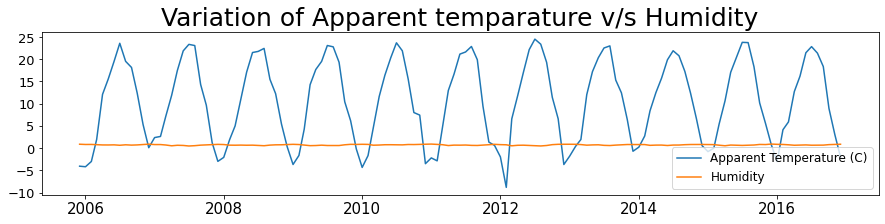

In [8]:
plt.figure(figsize=(15,3))
plt.plot(resampled_data['Apparent Temperature (C)'], label = 'Apparent Temperature (C)')
plt.plot(resampled_data['Humidity'], label='Humidity')
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25)
plt.legend (loc=0, fontsize = 12)
plt.xticks (fontsize = 15);
plt.yticks (fontsize = 13);

In [9]:
m=[[1,'January','2006-01-01','2016-01-01'],[2,'February','2006-02-01','2016-02-01'],
  [3,'March','2006-03-01','2016-03-01'],[4,'April','2006-04-01','2016-04-01'],
  [5,'May','2006-05-01','2016-05-01'],[6,'June','2006-06-01','2016-06-01'],
  [7,'July','2006-07-01','2016-07-01'],[8,'August','2006-08-01','2016-08-01'],
  [9,'September','2006-09-01','2016-09-01'],[10,'Octomber','2006-10-01','2016-10-01'],
  [11,'November','2006-11-01','2016-11-01'],[12,'December','2006-12-01','2016-12-01'],]

In [10]:
def plot_monthly_graph(i):
    december = resampled_data[resampled_data.index.month==m[i][0]]
    plt.figure(figsize=(15,3))
    plt.plot(december.loc[m[i][2] : m[i][3],'Apparent Temperature (C)'],label='Apparent Temperature (C)',marker='o')
    plt.plot(december.loc[m[i][2] : m[i][3],'Humidity'],label='Humidity',marker='o' )
    plt.legend (loc='center right', fontsize = 15)
    plt.xlabel("Month of "+m[i][1], fontsize = 15)
    plt.title("Humidity v/s Apparent Temperature", fontsize = 15)

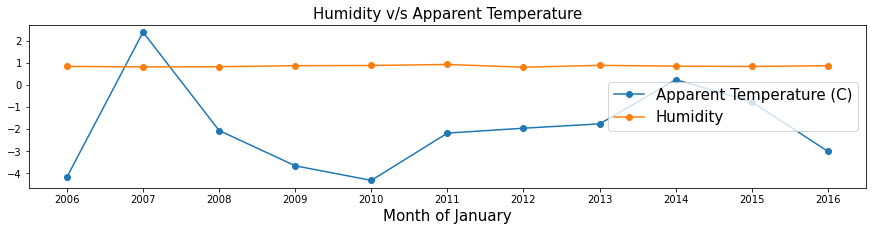

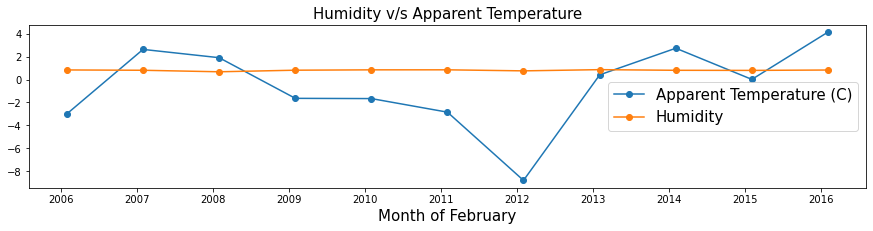

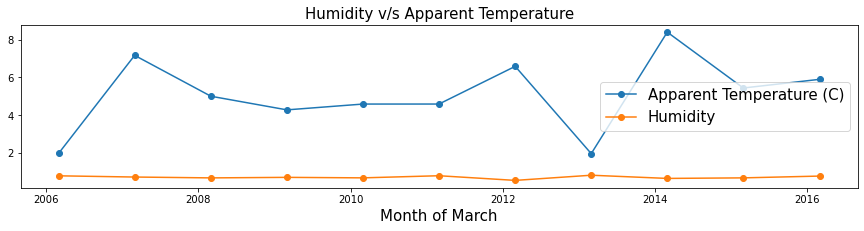

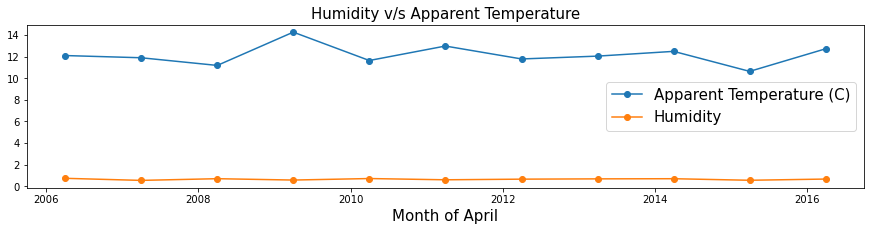

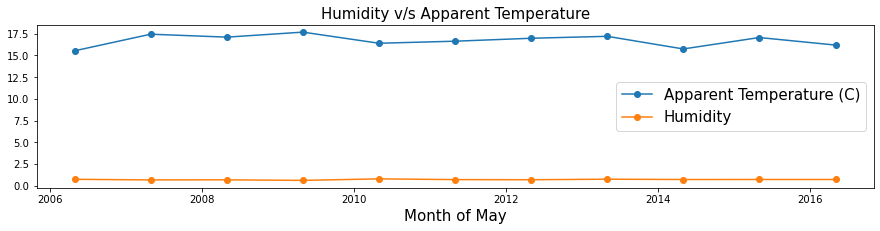

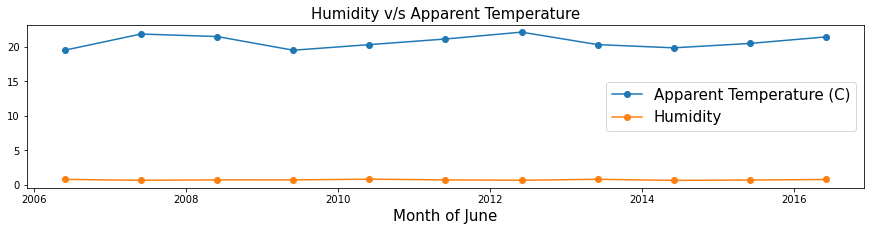

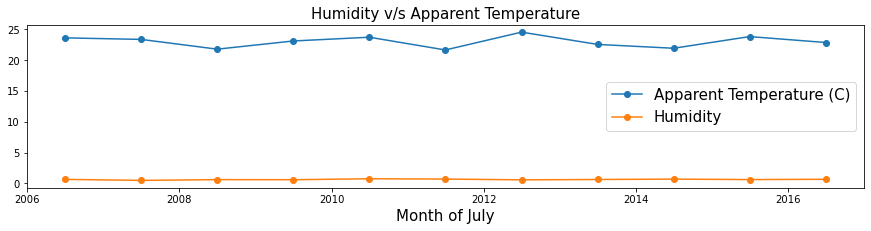

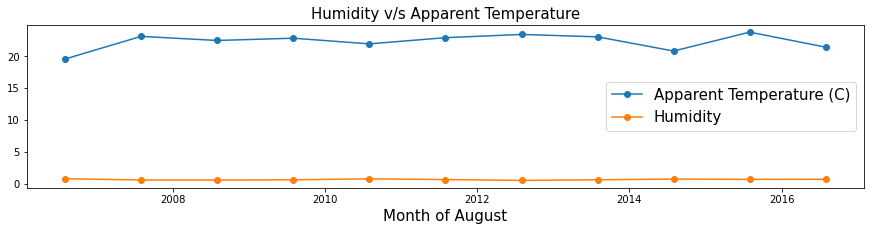

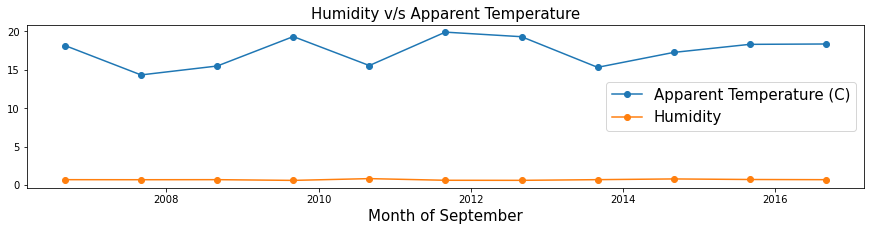

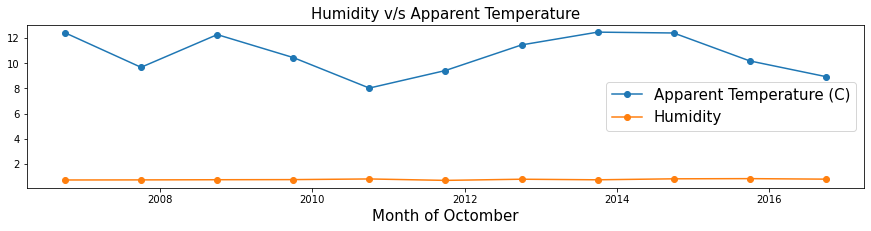

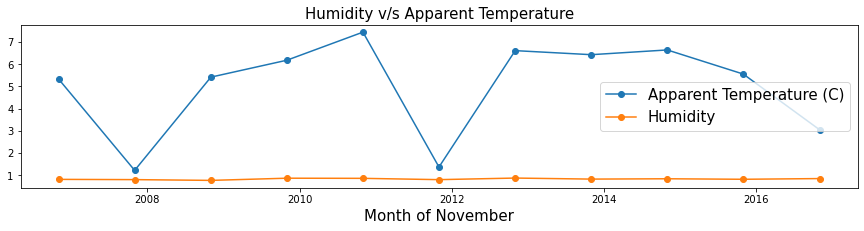

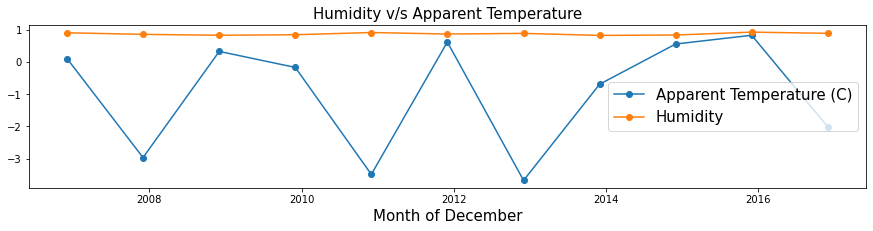

In [11]:
for i in range(0,12):
    plot_monthly_graph(i)